# Exemple d'utilisation d'OchunGRN
### I-Création de Graphe
La création de graphe aléatoire scale-free se fait avec la fonction `plotGraph`

In [31]:
import numpy as np
import GRNgene as oGRN
import matplotlib.pyplot as plt

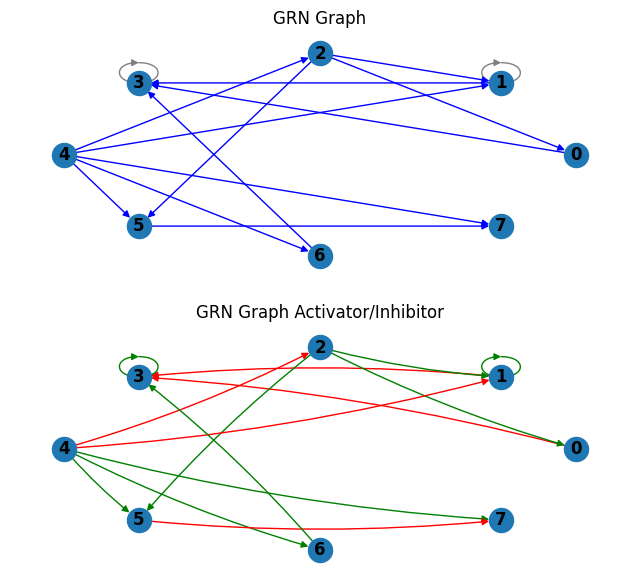

In [32]:
plt.rcParams['figure.figsize']= [8, 7]
folderpath = 'tests'
GENESNB = 8
test = oGRN.randomGrn(GENESNB, 0.2, 0.1)
oGRN.plotGraph(test, True)

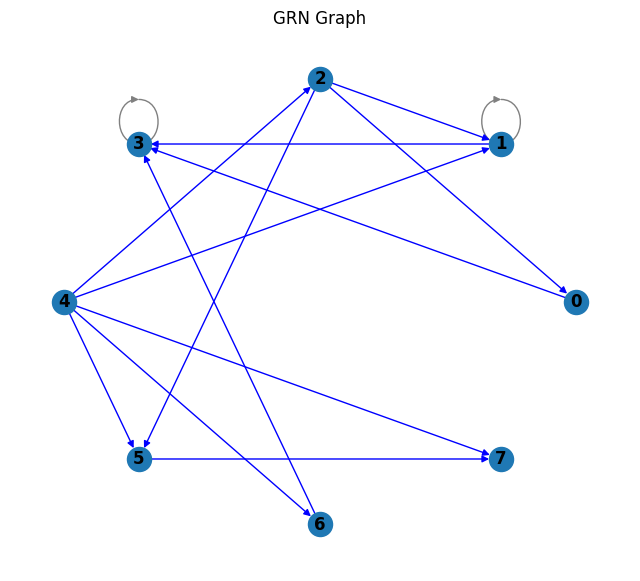

In [33]:
oGRN.plotGraph(test)

In [34]:
Coeff = oGRN.getCoefficient(GENESNB)

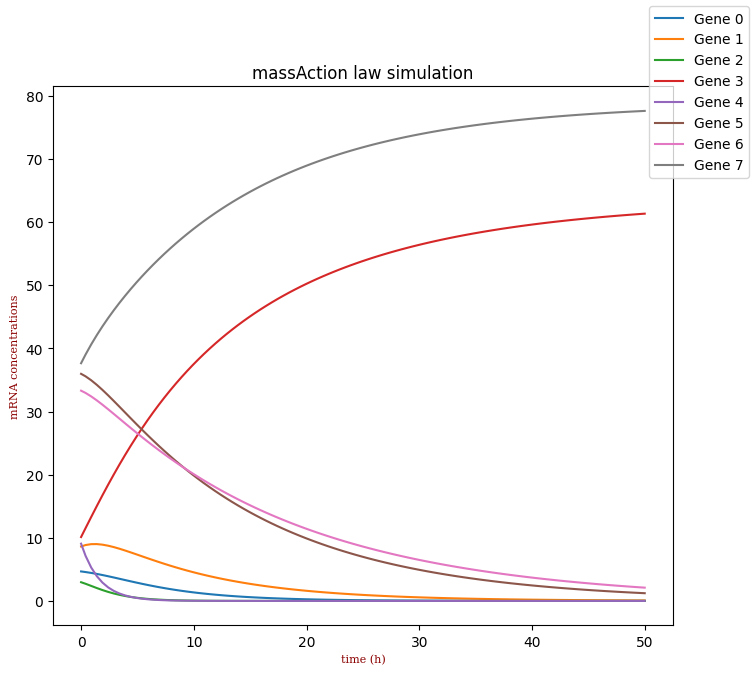

In [35]:
oGRN.simulationODEs(test, "massAction", (0,50), Coeff, stochasticNoiseAmplitude=0, physicalNoiseAmplitude=0, dropOutRate=0)
oGRN.plotSim(test, saveName=f"{folderpath}/testmassAction.png")

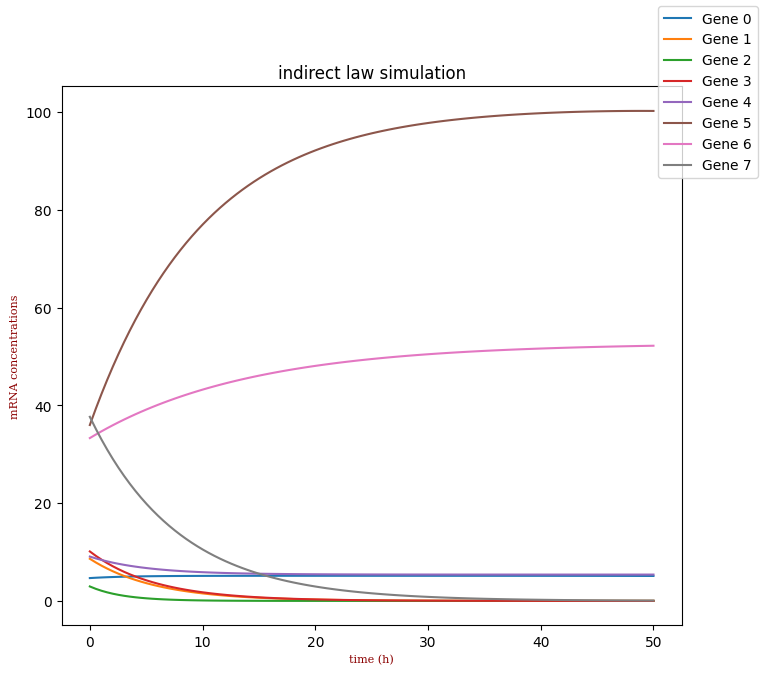

In [36]:
oGRN.simulationODEs(test, "indirect", (0,50), Coeff, stochasticNoiseAmplitude=0, physicalNoiseAmplitude=0, dropOutRate=0)
oGRN.plotSim(test, ODEs="indirect", saveName=f"{folderpath}/testindirect.png")

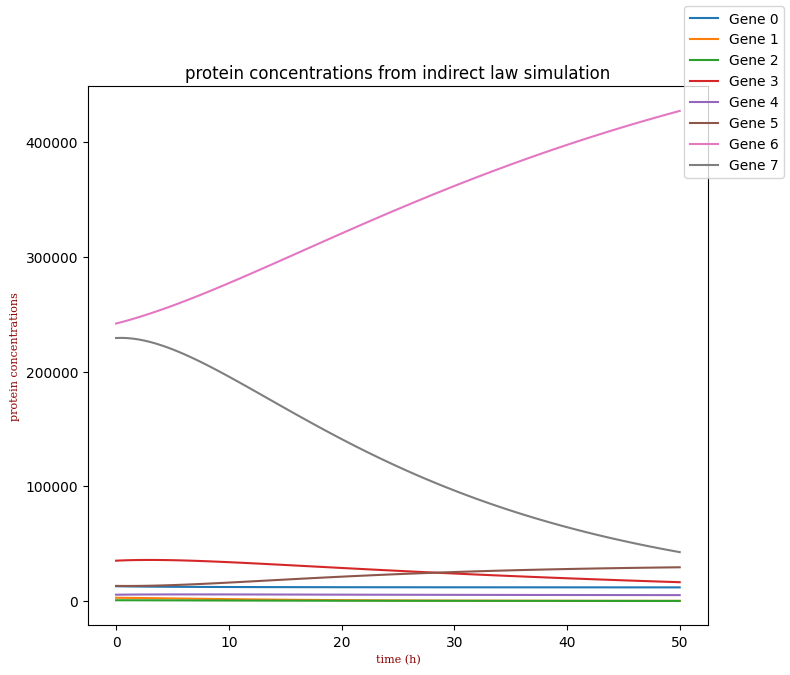

In [37]:
oGRN.plotProt(test, saveName=f"{folderpath}/testindirectProt.png")

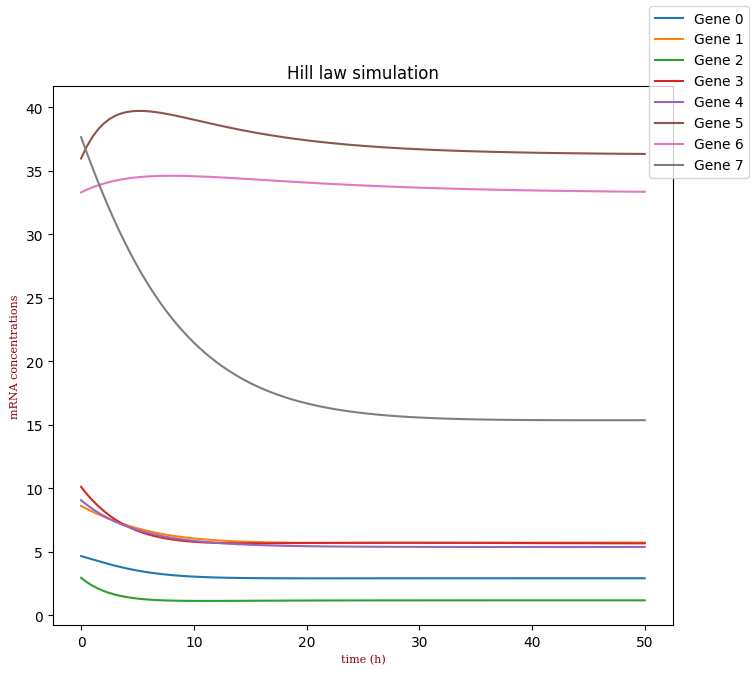

In [38]:
oGRN.simulationODEs(test, "Hill", (0,50), Coeff, stochasticNoiseAmplitude=0, physicalNoiseAmplitude=0, dropOutRate=0)
oGRN.plotSim(test, ODEs="Hill", saveName=f"{folderpath}/testHill.png")

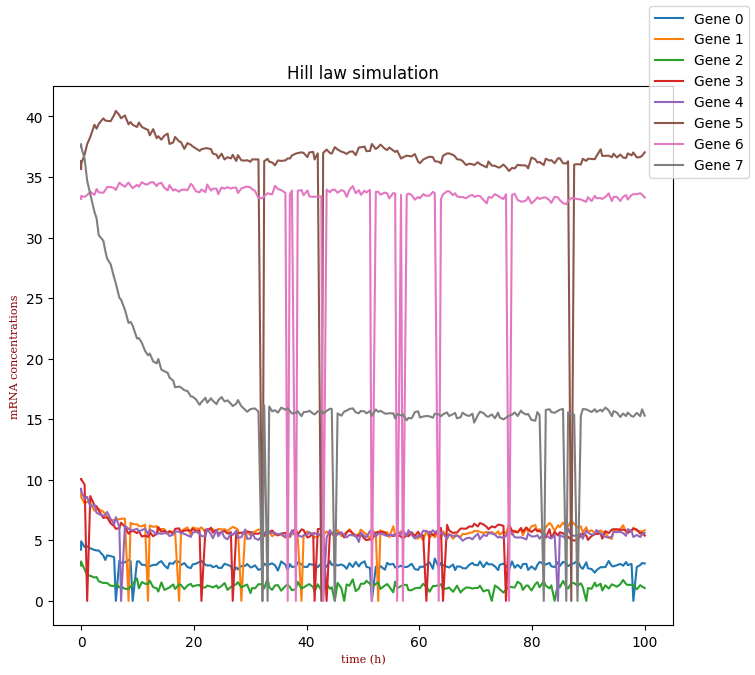

In [40]:
oGRN.simulationODEs(test, ["Hill"], (0,100), Coeff)
oGRN.plotSim(test, saveName=f"{folderpath}/test.png")

{'Graph': <networkx.classes.digraph.DiGraph object at 0x0000026C4C9C1AB0>, 'genesNb': 8, 'autoRG': 0.0, 'duoRG': 0.45454545454545453, 'AdjMatrice': array([[ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0, -1, -1,  0,  0],
       [ 0,  1,  0,  1,  0, -1, -1,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [-1,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0]]), 'meanClustering': np.float64(0.45799278846153846), 'subGraph': {'0-2-1': 'Mutual-In', '0-2-3': 'Mutual-In', '0-2-5': 'Mutual-In', '0-2-6': 'Mutual-Cascade', '1-2-3': 'Semi-Clique', '1-2-4': 'Bi-Mutual', '1-2-5': 'Semi-Clique', '1-2-6': 'Bi-Mutual', '1-4-3': 'Mutual-In', '1-4-5': 'Mutual-Out', '1-4-7': 'Mutual-In', '1-5-3': 'Cascade', '2-3-5': 'Bi-Mutual', '2-3-6': 'Bi-Mutual', '2-5-6': 'Bi-Mutual', '2-6-7': 'Mutual-Out', '6-0-7': 'Fan-Out', '6-7-4': 'Cascade'}}


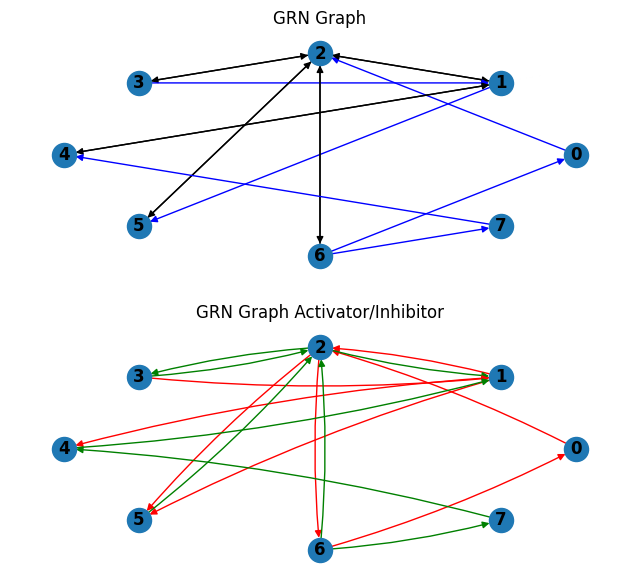

In [41]:
AdjMatrice = np.array([[0, 0, -1, 0, 0, 0, 0, 0],
                       [0, 0, -1, 0, -1, -1, 0, 0],
                       [0, 1, 0, 1, 0, -1, -1, 0],
                       [0, -1, 1, 0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [-1, 0, 1, 0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1, 0, 0, 0]])
#for i in range(8):
#    for j in range(8):
#        if AdjMatrice[i][j] != 0 and rd.random() < 0.5:
#            AdjMatrice[i][j] = -1
test2 = oGRN.GrnFromAdj(AdjMatrice)
print(test2)
oGRN.plotGraph(test2, True)

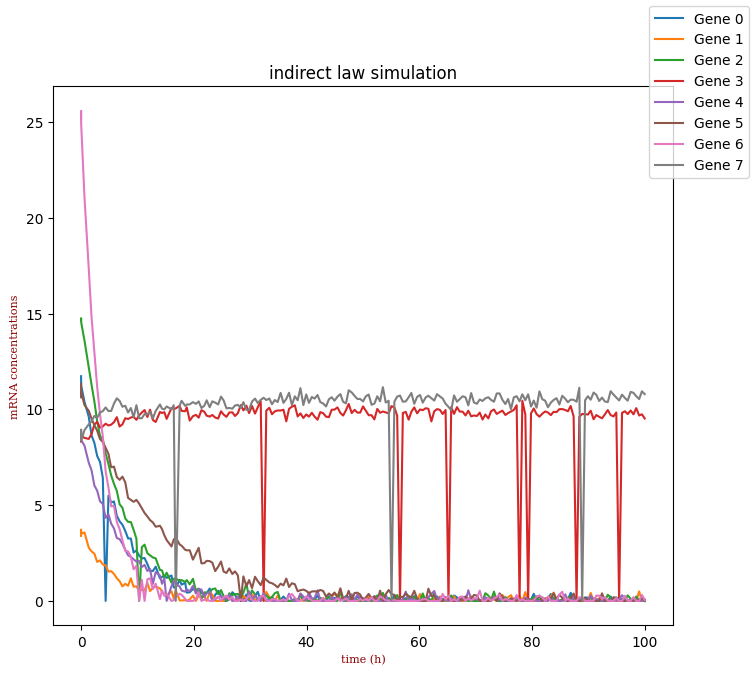

In [43]:
oGRN.simulationODEs(test2, ["indirect"], (0,100))
oGRN.plotSim(test2,saveName=f"{folderpath}/test2.png")

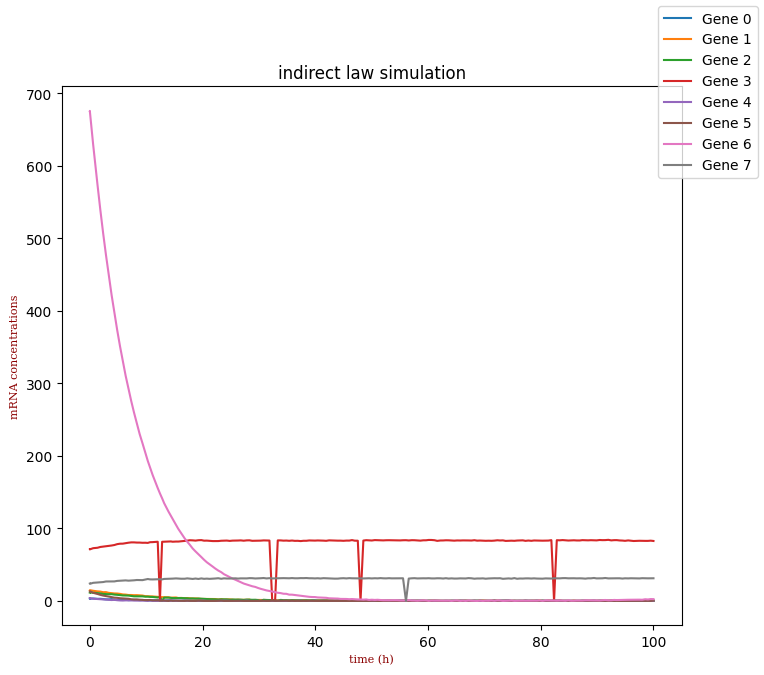

In [44]:
oGRN.simulationODEs(test2, ["indirect"], (0,100))
oGRN.plotSim(test2)

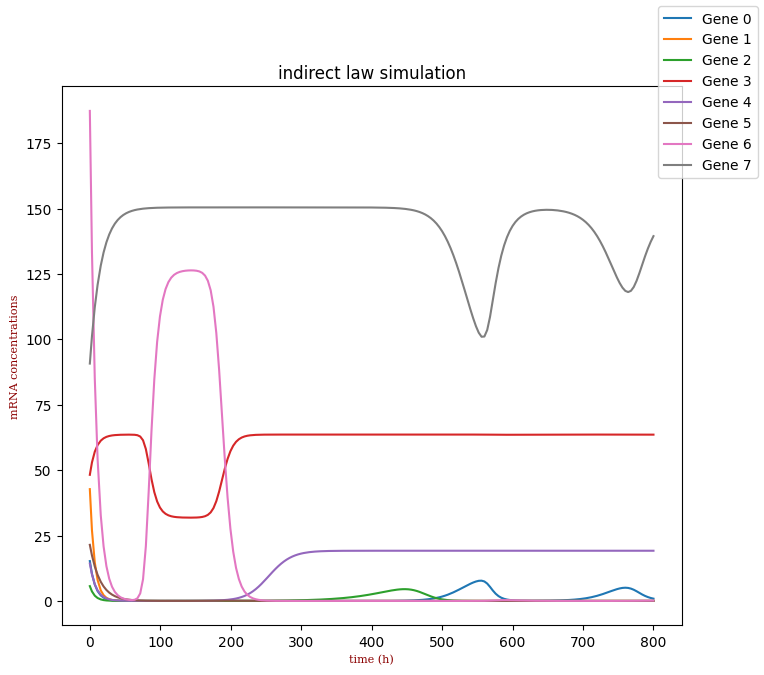

In [45]:
Coeff = {'ProtsDeg': [0.01220938929787702, 0.032996116714257936, 0.19267214746227454, 0.02001717710365315, 0.06135416756499328, 0.04033695272028223, 0.027756890331169678, 0.014136481031318423],
         'mRNAsDeg': [0.1274066272408194, 0.1520659744487199, 0.1477757118467184, 0.12170512584966396, 0.11469696369611478, 0.06942629172180143, 0.11250704553485244, 0.06367463135403399],
         'TranscriptionsRate': [1.37, 4.05, 0.52, 3.87, 1.1, 1.19, 14.24, 4.79],
         'TranslationsRate': [3.52, 98.98, 6189.55, 2374.19, 5.22, 14.8, 417.48, 396.9],
         'mRNAAvg': [15.23, 42.73, 5.65, 48.21, 14.3, 21.44, 187.34, 90.74],
         'ProtAvg': [3449.68, 107158.53, 299273.97, 3452663.15, 1400.16, 7334.45, 2117842.89, 1181752.03]}
oGRN.simulationODEs(test2, ["indirect"], (0,800), Coeff, physicalNoiseAmplitude=0, stochasticNoiseAmplitude=0, dropOutRate=0)
oGRN.plotSim(test2, saveName=f"{folderpath}/sde_ode")

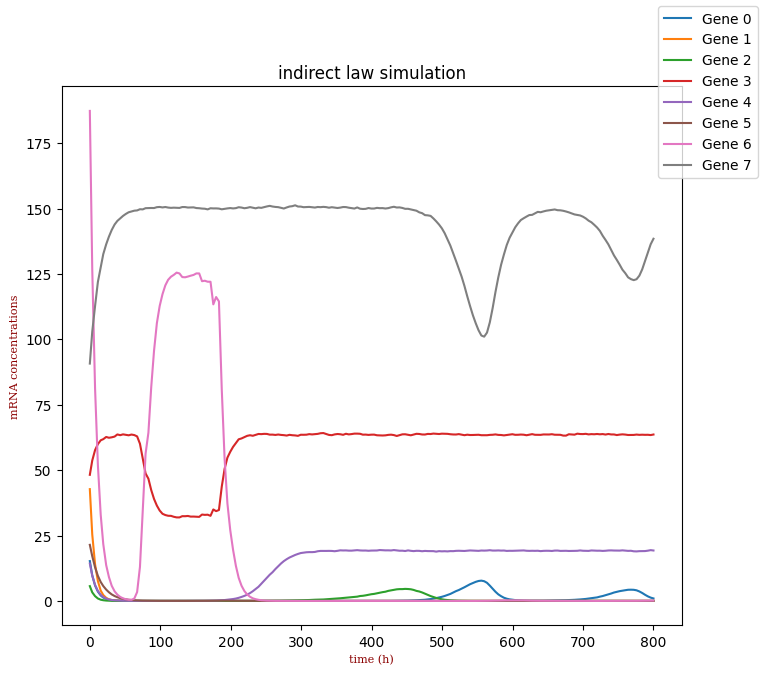

In [46]:
oGRN.simulationODEs(test2, ["indirect"], (0,800), Coeff, physicalNoiseAmplitude=0, stochasticNoiseAmplitude=0.2, dropOutRate=0)
oGRN.plotSim(test2, saveName=f"{folderpath}/sde_sde")

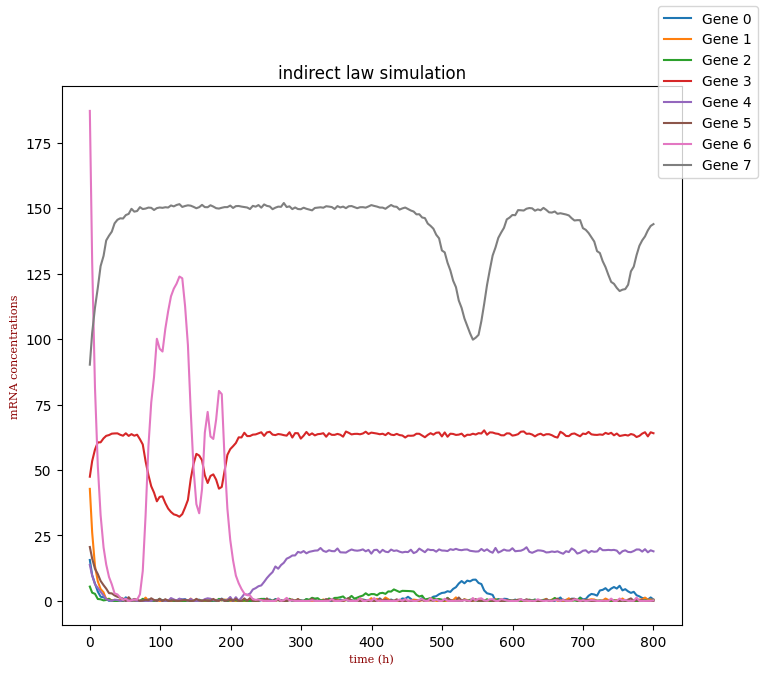

In [47]:
oGRN.simulationODEs(test2, ["indirect"], (0,800), Coeff, physicalNoiseAmplitude=0.5, stochasticNoiseAmplitude=0.2, dropOutRate=0)
oGRN.plotSim(test2, saveName=f"{folderpath}/sde_noise")

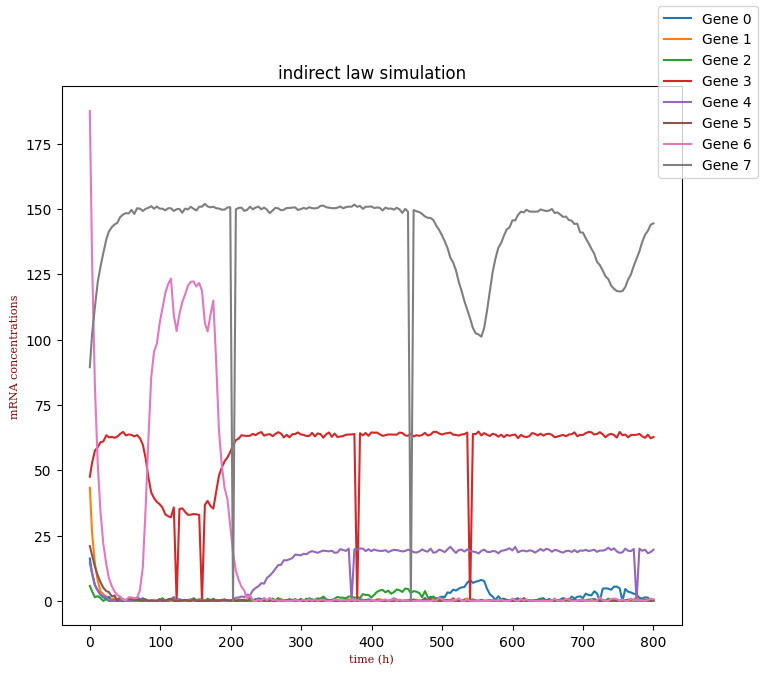

In [48]:
oGRN.simulationODEs(test2, ["indirect"], (0,800), Coeff, physicalNoiseAmplitude=0.5, stochasticNoiseAmplitude=0.2, dropOutRate=0.02)
oGRN.plotSim(test2, saveName=f"{folderpath}/sde_dropOut")

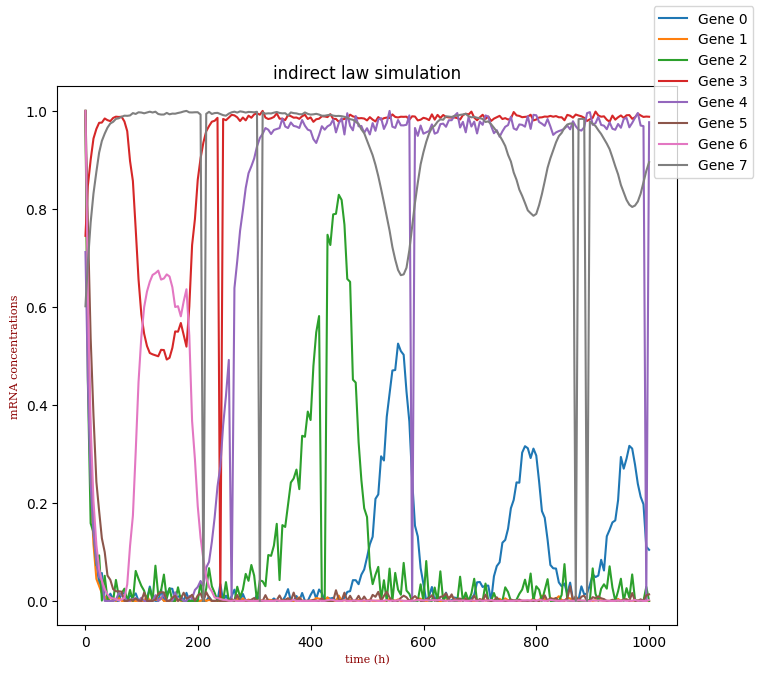

In [49]:
oGRN.simulationODEs(test2, ["indirect"], (0,1000), Coeff, normalisationBool=True, stochasticNoiseAmplitude=0.2, physicalNoiseAmplitude=0.2, dropOutRate=0.02)
oGRN.plotSim(test2, saveName=f"{folderpath}/sde_normalization")

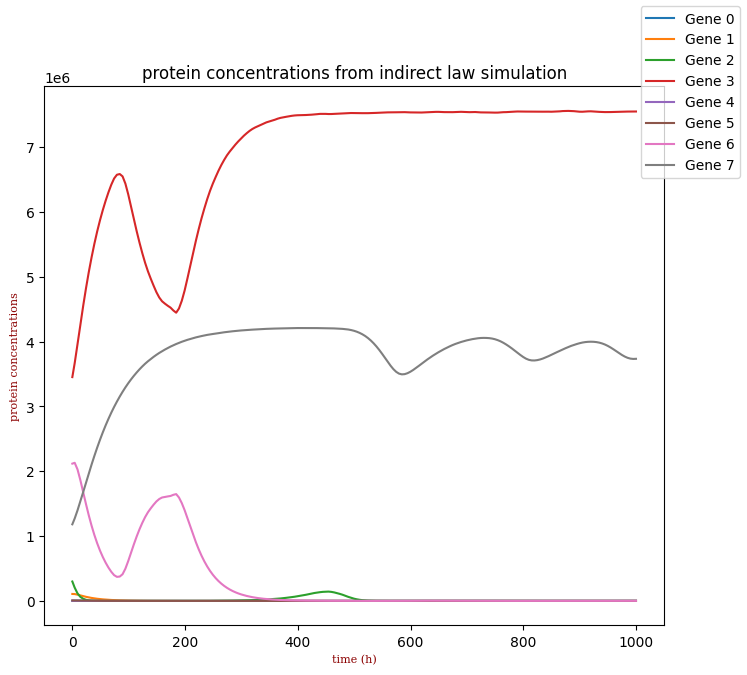

In [50]:
oGRN.plotProt(test2)

In [51]:
FFLmotif = oGRN.randomGrn(100,0.1,0.02)
DictFFL=FFLmotif["subGraph"]
motifs = {v:0 for v in DictFFL.values()}
N=len(DictFFL)
print(N)
for i in DictFFL.keys():
    motifs[DictFFL[i]]+=1
    if DictFFL[i]=='FFL':
        print(i)
print(sorted(motifs.items(), key=lambda item: item[1]))
print(motifs['FFL']/N)

1044
0-48-2
1-3-2
1-3-8
1-8-10
2-3-4
2-4-5
2-4-6
2-4-17
2-6-24
2-6-59
2-9-76
2-12-15
2-23-46
4-6-72
6-18-55
[('Regulating-Mutual', 1), ('Bi-Mutual', 1), ('Regulated-Mutual', 1), ('Mutual-Cascade', 1), ('FFL', 15), ('Mutual-In', 18), ('Mutual-Out', 60), ('Fan-In', 98), ('Cascade', 290), ('Fan-Out', 559)]
0.014367816091954023


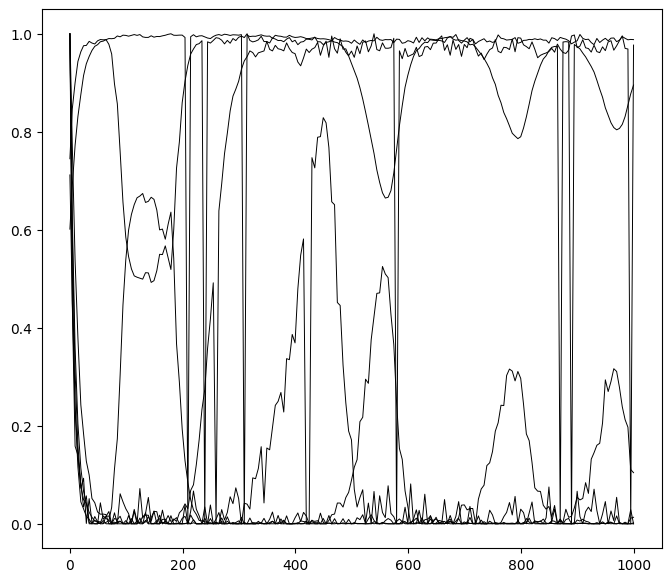

In [52]:
plt.figure()
plt.rcParams['figure.figsize']= [12, 7]
for gene in range(test2["genesNb"]):
    plt.plot(test2["indirectX"], test2["indirectY"][gene], color="k", linewidth=0.7)
plt.savefig(f"{folderpath}/PowerPoint.png")

In [53]:
print(len(test2["indirectX"]))

201
